# 3. Explotatory data analysis

## 3.1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.font_manager
import data_functions
from data_functions import beautiful_graph
from data_functions import beautiful_lineplot

## 3.3 Reading data

In [2]:
full_cars = pd.read_csv('../data/clean_cars.csv')

In [3]:
cars = pd.read_csv('../data/hard_clean_cars.csv')

In [4]:
# Changing Units for clarity
cars['km'] = cars['km']/1000
cars.columns=map(lambda x: x.replace('km','Mm'),cars.columns)
cars['price'] = cars['price']/1000

## 3.4 Data visualization

In [5]:
# Setting font parameters
plt.rcParams['font.family'] = 'Montserrat'
plt.rcParams['font.serif'] = 'Montserrat'
plt.rcParams['font.monospace'] = 'Montserrat Mono'
plt.rcParams['font.size'] = 11

In [6]:
# General overview of the numerical dataset
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52888.0,5.909469,3.605461,1.000,4.00000,5.0000,7.00000,54.0
cv,52888.0,138.449213,59.583880,41.000,109.00000,127.0000,150.00000,720.0
Mm,52888.0,82.970911,112.565270,0.001,39.03825,72.1175,112.57175,16106.1
doors,52888.0,4.736897,0.685883,2.000,5.00000,5.0000,5.00000,5.0
price,52888.0,21.520534,13.930202,0.500,13.90000,18.9800,25.90000,565.0
boot,52888.0,430.539347,140.012812,32.000,350.00000,420.0000,510.00000,2500.0
height,52888.0,154.108720,10.621458,114.000,146.00000,151.0000,162.00000,200.0
seats,52888.0,4.980544,0.532865,2.000,5.00000,5.0000,5.00000,9.0
cmixto,52888.0,5.042151,1.285931,1.300,4.20000,4.8000,5.50000,21.3
0-100,52888.0,10.365121,2.136784,2.700,9.00000,10.5000,11.60000,20.2


### 3.4.1 Colors

In [7]:
# Translating colors to english
translate = { 'blanco': 'White', 'gris': 'Gray', 'negro': 'Black', 'azul': 'Blue', 'rojo': 'Red',
'otros': 'others', 'plateado': 'Silver', 'marron': 'Brown', 'beige': 'Beige', 'naranja': 'Orange', 'verde': 'Green', 'amarillo': 'Yellow'}

for color_es, color in zip(translate.keys(),translate.values()):
    cars['color'] = np.where(cars['color']==color_es,color,cars['color'])

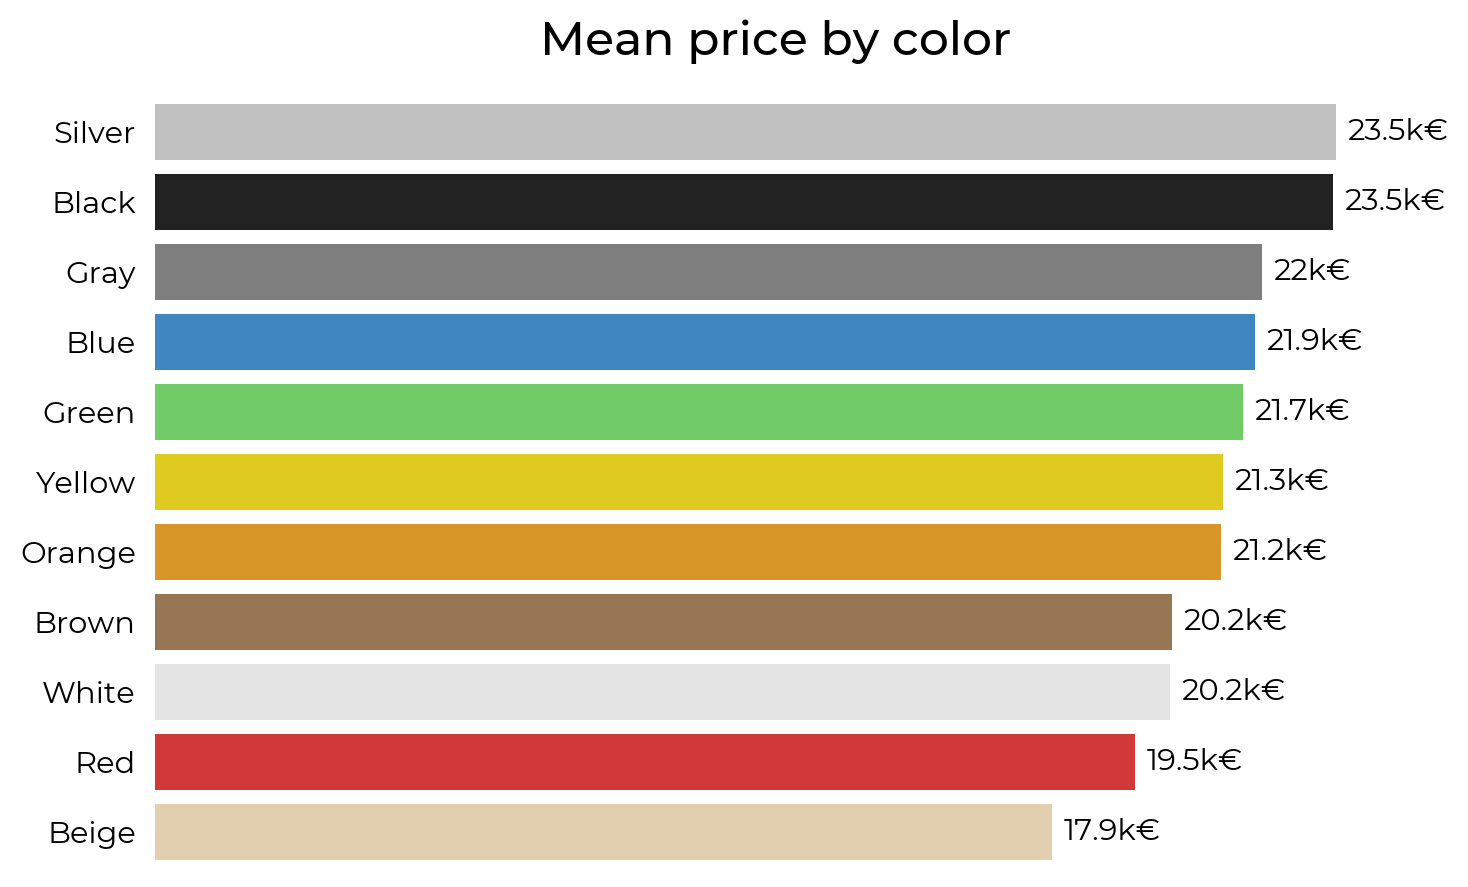

In [86]:
plt.figure(figsize=(8,5),dpi=200)
plot_data = cars[cars['color']!='others'].copy()
result = plot_data.groupby(["color"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(y="color", x="price", data=cars[cars['color']!='other'], errorbar=None,
                 palette=['silver','#222222', '#7e7e7e', '#2a88d6', '#64dc56','#ffe400',
                          '#f59d0c','#a37847','#e5e5e5','#ea1f1f','#ebd1a7'], order = result['color'], orient='h')

beautiful_graph(ax=ax, title = 'Mean price by color', ytitle = '', xtitle = '',
                     format_ = '%.3gk€',name='price-color', label='left')
plt.show()

### 3.4.2 Brands

In [9]:
# Capitalizing brands
cars['brand'] = cars['brand'].map(lambda x: x.capitalize())

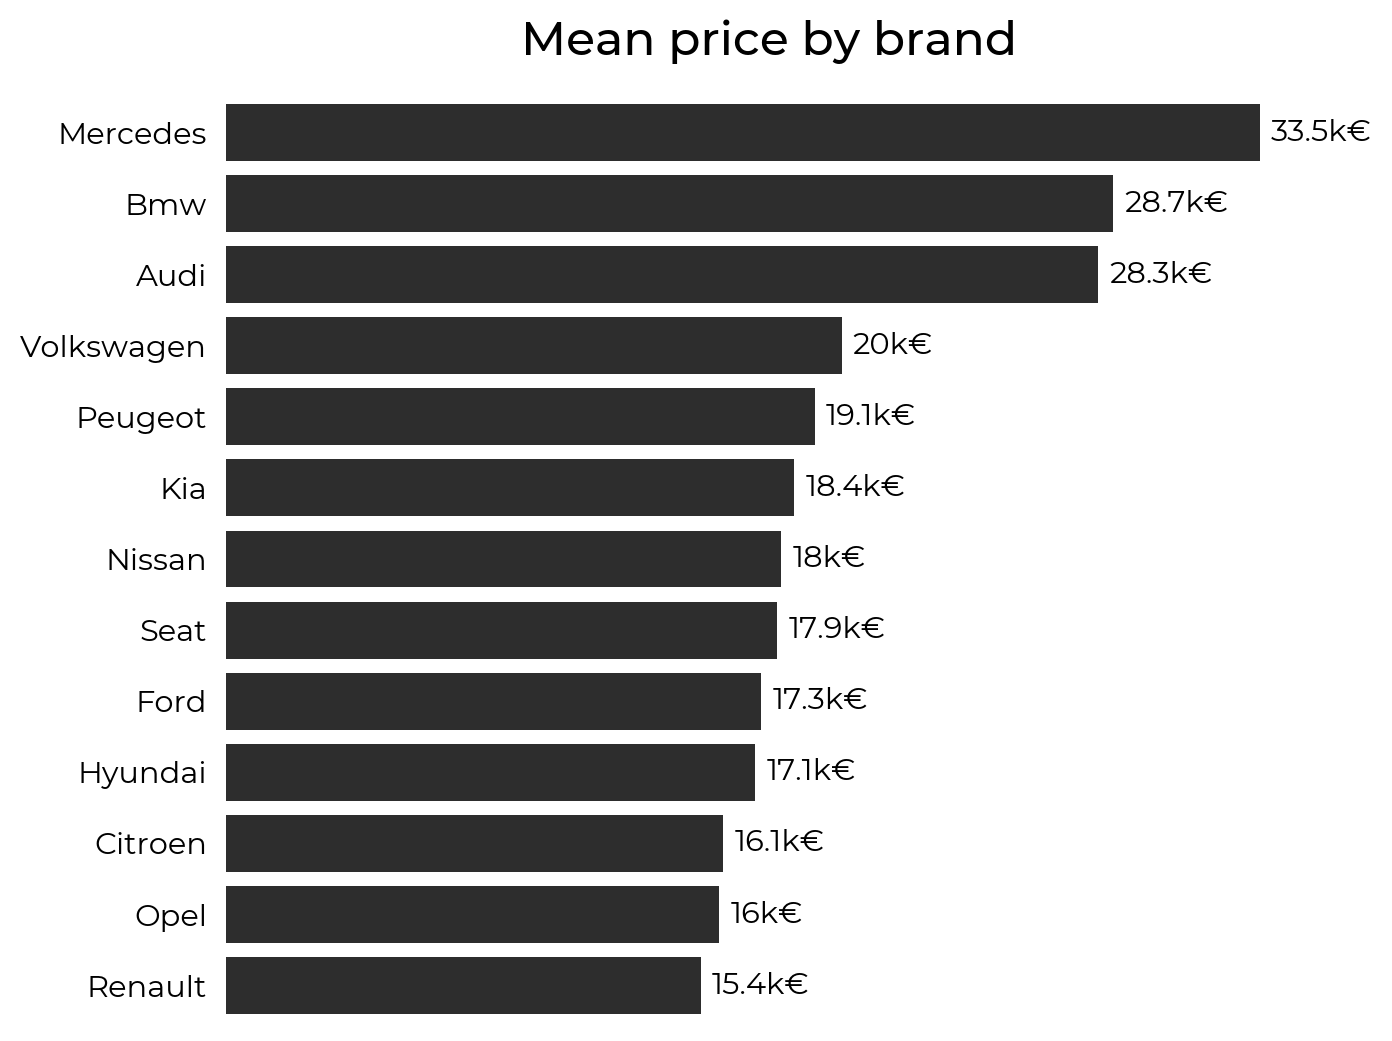

In [87]:
plt.figure(figsize=(7,6),dpi=200)
plot_data = cars[cars['brand'].isin(cars.brand.value_counts()[0:13].index)].copy()

result = plot_data.groupby(["brand"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(y="brand", x="price", data=plot_data, errorbar=None,color='#2d2d2d', order=result['brand'], orient ='h')
plt.xticks([])
beautiful_graph(ax=ax, title = 'Mean price by brand', ytitle = '', xtitle = '',
                     format_ = '%.3gk€',name='price-brand',angle=0,label='left')

### 3.4.3 Brands through time
Do all brands lose their value at the same rate? Let's have a look at the data!

In [11]:
common_brands = cars.brand.value_counts()[0:5].index
plot_data = cars[cars['brand'].isin(common_brands)].copy()

In [12]:
common_brands

Index(['Peugeot', 'Audi', 'Bmw', 'Mercedes', 'Volkswagen'], dtype='object')

In [13]:
brands_evo = {}
for brand in common_brands:
    brand_evo = pd.DataFrame(columns=['year','mean_price'])
    for year in range(1,10+1):
        brand_evo.loc[year-1,:] = year,100*plot_data[(plot_data['brand']==brand)&(plot_data['year']==year)].price.mean()/plot_data[(plot_data['brand']==brand)&(plot_data['year']==1)].price.mean()
    brands_evo[brand] = brand_evo
colors = ['#e60049',"#0bb4ff","#36d6a6","#e6d800","#9b19f5"]
    
general_evo = pd.DataFrame(columns=['year','mean_price'])
for year in range(1,10+1):
        general_evo.loc[year-1,:] = year,100*np.mean([brands_evo[brand][brands_evo[brand]['year']==year]['mean_price'] for brand in common_brands])/np.mean([brands_evo[brand][brands_evo[brand]['year']==1]['mean_price'] for brand in common_brands])


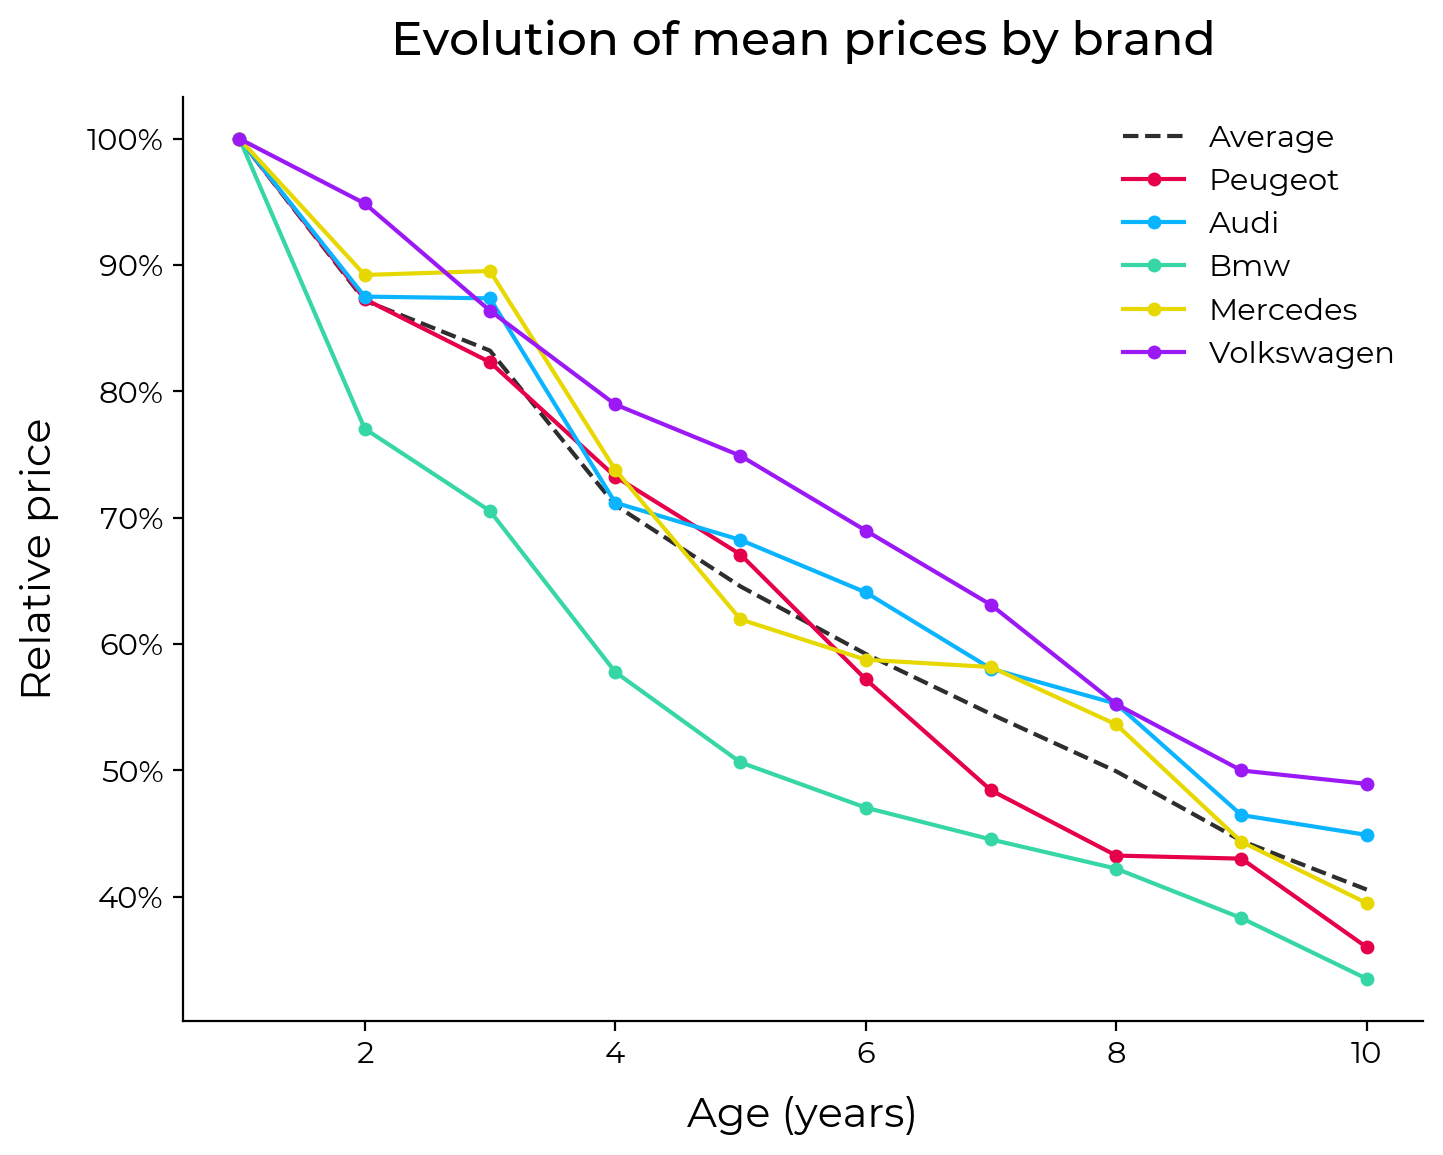

In [40]:
plt.figure(figsize=(8,6),dpi=200)

ax = sns.lineplot(data=general_evo, x='year',y='mean_price', color = '#2e2e2e', label = 'Average')
ax.lines[0].set_linestyle("--")
for i,brand in enumerate(common_brands):
    ax = sns.lineplot(data=brands_evo[brand], x='year',y='mean_price', color= colors[i], marker = "o", markeredgewidth=0, markersize=5, label = brand)

    
beautiful_lineplot(ax=ax, title = 'Evolution of mean prices by brand', xtitle = 'Age (years)', ytitle = 'Relative price',format_= '{x:.0f}%')
plt.show()

### 3.4.4 Fuel type

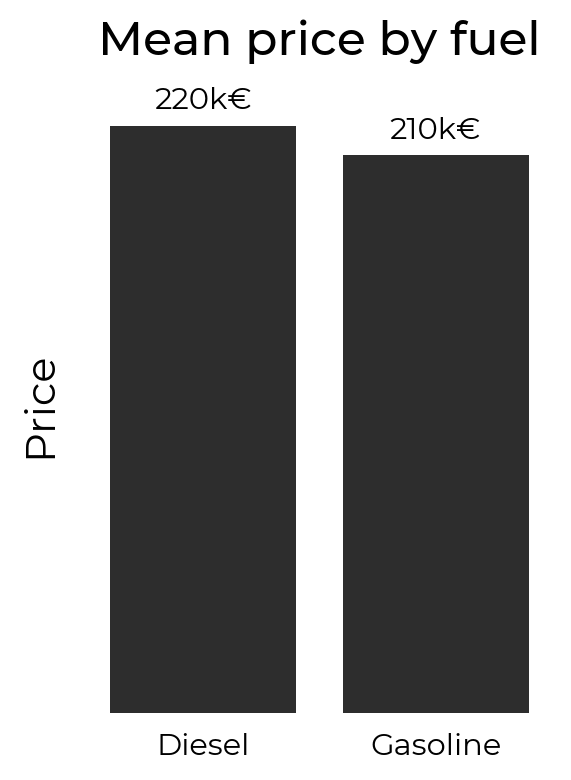

In [96]:
plt.figure(figsize=(3,4),dpi=200)
plot_data = cars.copy()
plot_data['fuel'] = np.where(cars['fuel']=='gasolina','Gasoline','Diesel')

result = plot_data.groupby(["fuel"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)

ax = sns.barplot(x="fuel", y="price", data=plot_data, errorbar=None,color='#2d2d2d', order=result['fuel'])

beautiful_graph(ax=ax, title = 'Mean price by fuel', xtitle = '', ytitle = 'Price',
                     format_ = '%.f0k€',name='price-fuel',angle=0)

### 3.4.5 CV

In [48]:
cv_bin,order = data_functions.binning(cars[cars['cv']>=50]['cv'].reset_index(drop=True),bins=6,threshold=250,decimals=None)

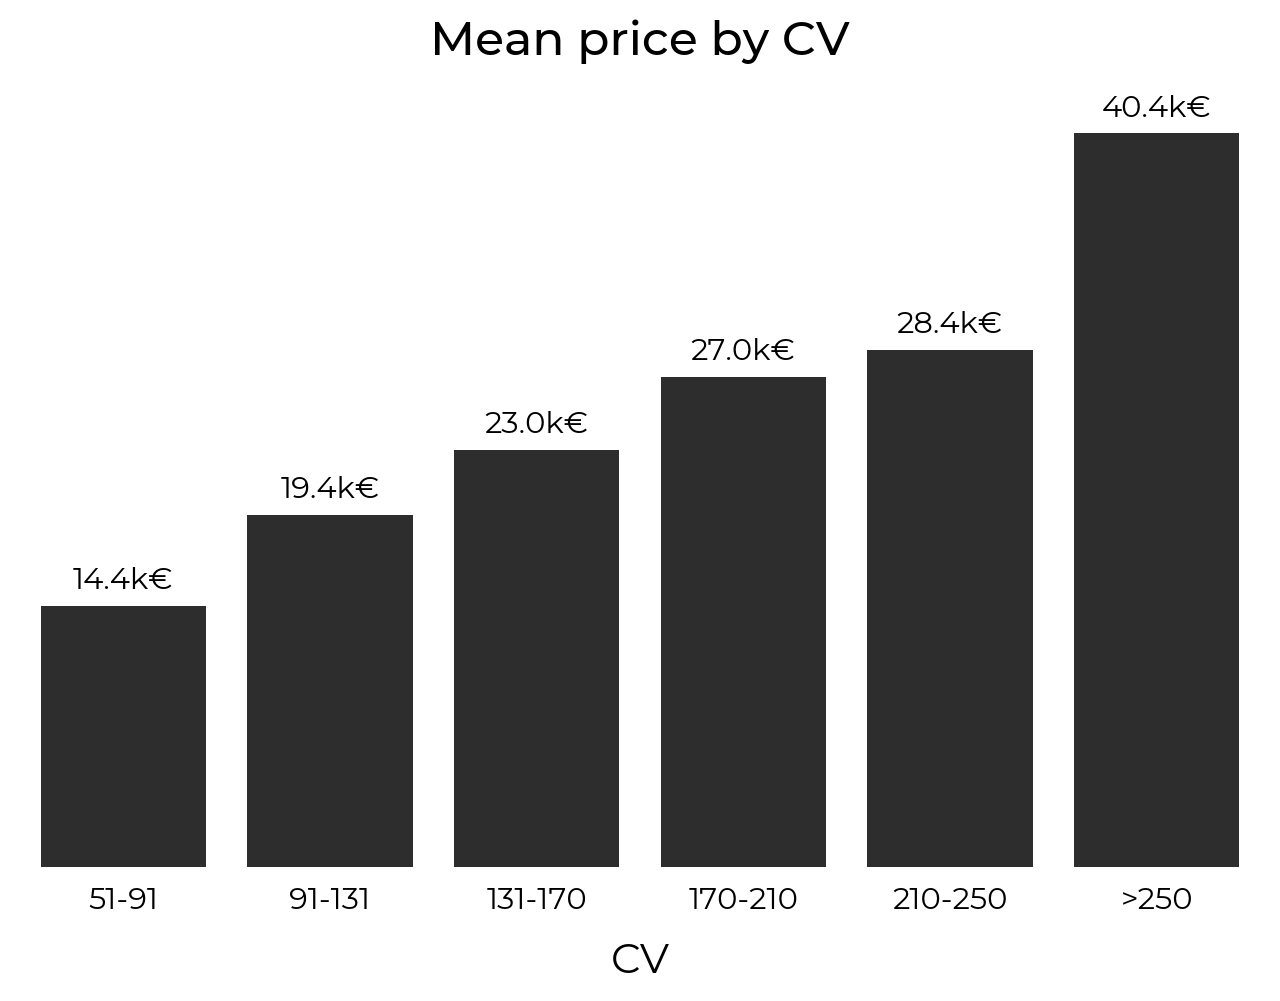

In [51]:
plt.figure(figsize=(8,5),dpi=200)
plot_data = cars[cars['cv']>=50].copy()
plot_data['cv_bin'] = cv_bin

ax = sns.barplot(x="cv_bin", y="price", data=plot_data, errorbar=None,color='#2d2d2d', order=order)

beautiful_graph(ax=ax, title = 'Mean price by CV', xtitle = 'CV', ytitle = '',
                     format_ = '%.1fk€',name='price-cv',angle=0)



### 3.4.6 Location

In [56]:
plot_data = cars[cars['location'].isin(cars.brand.value_counts()[0:10].index)].copy()
result = plot_data.groupby(["brand"])['price'].aggregate(np.mean).reset_index().sort_values('price',ascending=False)


,year,cv,km,fuel,doors,gearbox,color,brand,price,boot,...,seats,cmixto,0-100,displac,cylinders,max_par,gear,class,location,area
0,6,326,94000,gasolina,2,automatic,blanco,bmw,35900,445,...,4,6.6,5.0,2998,less4 inline,450,8,sport,rioja+la,84912
1,2,252,29187,gasolina,2,manual,blanco,other,65450,100,...,2,6.4,4.5,1798,4 inline,320,7,sport,rioja+la,75240
2,4,150,40012,gasolina,5,manual,rojo,renault,20950,377,...,5,5.6,9.9,1333,4 inline,220,6,4x4,rioja+la,73336
3,14,224,329000,diesel,5,automatic,negro,mercedes,10900,450,...,5,7.9,7.5,2987,6 V,540,7,4x4,rioja+la,84258
4,1,90,5450,gasolina,5,manual,naranja,renault,23450,536,...,5,5.3,14.0,999,more4 inline,160,6,4x4,rioja+la,76140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285217,6,180,51000,diesel,5,automatic,gris,jaguar,36100,565,...,5,4.6,7.1,1999,4 inline,430,8,standard,valencia,98704
285218,5,150,112399,diesel,5,automatic,gris,audi,28700,480,...,5,4.2,8.9,1968,4 inline,320,7,standard,valencia,87032
285219,6,116,62241,gasolina,4,automatic,amarillo,audi,18400,425,...,5,4.6,9.9,999,more4 inline,200,7,standard,valencia,80280
285220,7,69,49137,gasolina,5,manual,blanco,toyota,11155,286,...,5,4.3,15.3,998,more4 inline,93,5,standard,valencia,66130


In [ ]:
plt.figure(figsize=(8,7),dpi=200)

ax = sns.barplot(y="brand", x="price", data=plot_data, errorbar=None,color='#2d2d2d', order=result['brand'], orient ='h')
plt.xticks([])
beautiful_graph(ax=ax, title = 'Mean price by brand', ytitle = '', xtitle = 'Price',
                     format_ = '%.3gk€',name='price-brand',angle=0,label='left')

In [67]:
full_cars.groupby(['location'])['price'].mean().mean()

21380.734706937175

In [ ]:
"""import shutil
import matplotlib

shutil.rmtree(matplotlib.get_cachedir())"""

In [70]:
a = pd.read_csv('../data/clean_cars.csv')

In [77]:
a['location'] = a['location'].map(lambda x: x.capitalize())

In [79]:
a.to_csv('../data/clean_cars.csv')